In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import folium
import pymongo
from folium import plugins
import requests
from bs4 import BeautifulSoup as bs

In [2]:
cliente=pymongo.MongoClient()
cliente.database_names()

C:\Users\Lenovo\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: database_names is deprecated. Use list_database_names instead.
  


['Oficinas', 'admin', 'companies', 'config', 'local']

In [3]:
ofi=cliente.companies

In [4]:
ofi.collection_names()

C:\Users\Lenovo\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: collection_names is deprecated. Use list_collection_names instead.
  """Entry point for launching an IPython kernel.


['companies']

In [5]:
ofi_colec = ofi.companies

In [6]:
m=list(ofi_colec.find({},{'_id':0,'category_code':1}))

In [7]:
categories=[]
for i in m:
    categories.append(i['category_code'])


In [8]:
category_f=list(set(categories))

In [9]:
category_f.sort()

In [10]:
category_f

['advertising',
 'analytics',
 'automotive',
 'biotech',
 'cleantech',
 'consulting',
 'design',
 'ecommerce',
 'education',
 'enterprise',
 'fashion',
 'finance',
 'games_video',
 'government',
 'hardware',
 'health',
 'hospitality',
 'legal',
 'local',
 'manufacturing',
 'medical',
 'messaging',
 'mobile',
 'music',
 'nanotech',
 'network_hosting',
 'news',
 'nonprofit',
 'null',
 'other',
 'photo_video',
 'public_relations',
 'real_estate',
 'search',
 'security',
 'semiconductor',
 'social',
 'software',
 'sports',
 'transportation',
 'travel',
 'web']

In [11]:
all1=list(ofi_colec.find({}))

In [12]:
df=pd.DataFrame(all1)

In [13]:
df.head()

,_id,name,permalink,crunchbase_url,homepage_url,blog_url,blog_feed_url,twitter_username,category_code,number_of_employees,...,offices,milestones,video_embeds,screenshots,external_links,partners,deadpooled_month,deadpooled_day,deadpooled_url,ipo
0,52cdef7c4bab8bd675297d8a,Wetpaint,abc2,http://www.crunchbase.com/company/wetpaint,http://wetpaint-inc.com,http://digitalquarters.net/,http://digitalquarters.net/feed/,BachelrWetpaint,web,47.0,...,"[{'description': '', 'address1': '710 - 2nd Av...","[{'id': 5869, 'description': 'Wetpaint named i...",[],"[{'available_sizes': [[[150, 86], 'assets/imag...",[{'external_url': 'http://www.geekwire.com/201...,[],NaN,NaN,NaN,NaN
1,52cdef7c4bab8bd675297d8b,AdventNet,abc3,http://www.crunchbase.com/company/adventnet,http://adventnet.com,,,manageengine,enterprise,600.0,...,"[{'description': 'Headquarters', 'address1': '...",[],[],"[{'available_sizes': [[[150, 94], 'assets/imag...",[],[],NaN,NaN,NaN,NaN
2,52cdef7c4bab8bd675297d8c,Zoho,abc4,http://www.crunchbase.com/company/zoho,http://zoho.com,http://blogs.zoho.com/,http://blogs.zoho.com/feed,zoho,software,1600.0,...,"[{'description': 'Headquarters', 'address1': '...","[{'id': 388, 'description': 'Zoho Reaches 2 Mi...","[{'embed_code': '<object width=""430"" height=""2...",[],[{'external_url': 'http://www.online-tech-tips...,[],NaN,NaN,NaN,NaN
3,52cdef7c4bab8bd675297d8d,Digg,digg,http://www.crunchbase.com/company/digg,http://www.digg.com,http://blog.digg.com/,http://blog.digg.com/?feed=rss2,digg,news,60.0,...,"[{'description': None, 'address1': '135 Missis...","[{'id': 9588, 'description': 'Another Digg Exe...","[{'embed_code': '<embed src=""http://blip.tv/pl...","[{'available_sizes': [[[117, 150], 'assets/ima...",[{'external_url': 'http://www.sociableblog.com...,[],NaN,NaN,None,None
4,52cdef7c4bab8bd675297d8e,Facebook,facebook,http://www.crunchbase.com/company/facebook,http://facebook.com,http://blog.facebook.com,http://blog.facebook.com/atom.php,facebook,social,5299.0,...,"[{'description': 'Headquarters', 'address1': '...","[{'id': 108, 'description': 'Facebook adds com...",[],"[{'available_sizes': [[[150, 68], 'assets/imag...",[{'external_url': 'http://latimesblogs.latimes...,[],NaN,NaN,,"{'valuation_amount': 104000000000, 'valuation_..."


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18801 entries, 0 to 18800
Data columns (total 42 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   _id                  18801 non-null  object        
 1   name                 18801 non-null  object        
 2   permalink            18801 non-null  object        
 3   crunchbase_url       18801 non-null  object        
 4   homepage_url         18801 non-null  object        
 5   blog_url             18801 non-null  object        
 6   blog_feed_url        18801 non-null  object        
 7   twitter_username     18801 non-null  object        
 8   category_code        18801 non-null  object        
 9   number_of_employees  8889 non-null   float64       
 10  founded_year         13136 non-null  float64       
 11  founded_month        7898 non-null   float64       
 12  founded_day          5569 non-null   float64       
 13  deadpooled_year      929 non-nu

In [15]:
df[df['category_code']=='null']

,_id,name,permalink,crunchbase_url,homepage_url,blog_url,blog_feed_url,twitter_username,category_code,number_of_employees,...,offices,milestones,video_embeds,screenshots,external_links,partners,deadpooled_month,deadpooled_day,deadpooled_url,ipo
876,52cdef7c4bab8bd6752980f6,Collective,collective,http://www.crunchbase.com/company/collective,null,null,null,null,null,NaN,...,[],[],[],[],[],[],NaN,NaN,None,None
1179,52cdef7c4bab8bd675298225,Snimmer,snimmer,http://www.crunchbase.com/company/snimmer,null,null,null,null,null,NaN,...,[],[],[],[],[],[],NaN,NaN,None,None
1180,52cdef7c4bab8bd675298226,KoolIM,koolim,http://www.crunchbase.com/company/koolim,null,null,null,null,null,NaN,...,[],[],[],[],[],[],NaN,NaN,None,None
1239,52cdef7c4bab8bd675298261,Level9 Media,level9-media,http://www.crunchbase.com/company/level9-media,null,null,null,null,null,NaN,...,[],[],[],[],[],[],NaN,NaN,None,None
1240,52cdef7c4bab8bd675298262,VidKing,vidking,http://www.crunchbase.com/company/vidking,http://www.VidKing.com,,,null,null,NaN,...,[],[],[],[],[],[],NaN,NaN,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18750,52cdef7f4bab8bd67529c6c8,Nellix,nellix,http://www.crunchbase.com/company/nellix,http://www.nellix.com,,,,null,NaN,...,"[{'description': '', 'address1': '2465-B Faber...",[],[],"[{'available_sizes': [[[150, 111], 'assets/ima...",[],[],NaN,NaN,None,None
18772,52cdef7f4bab8bd67529c6de,Cantimer,cantimer,http://www.crunchbase.com/company/cantimer,http://www.cantimer.com,,,,null,NaN,...,"[{'description': '', 'address1': '3700 Haven C...",[],[],"[{'available_sizes': [[[150, 107], 'assets/ima...",[],[],NaN,NaN,None,None
18782,52cdef7f4bab8bd67529c6e8,cruisecritic,cruisecritic,http://www.crunchbase.com/company/cruisecritic,null,null,null,null,null,NaN,...,[],[],[],[],[],[],NaN,NaN,None,None
18783,52cdef7f4bab8bd67529c6e9,Coloroot,coloroot,http://www.crunchbase.com/company/coloroot,null,null,null,null,null,NaN,...,[],[],[],[],[],[],NaN,NaN,None,None


In [16]:
df.isna().sum()

_id                        0
name                       0
permalink                  0
crunchbase_url             0
homepage_url               0
blog_url                   0
blog_feed_url              0
twitter_username           0
category_code              0
number_of_employees     9912
founded_year            5665
founded_month          10903
founded_day            13232
deadpooled_year        17872
tag_list                   0
alias_list                 0
email_address              0
phone_number               0
description                0
created_at                 0
updated_at                 0
overview                   0
image                   2626
products                   0
relationships              0
competitions               0
providerships              0
total_money_raised         0
funding_rounds             0
investments                0
acquisition            16124
acquisitions               0
offices                    0
milestones                 0
video_embeds  

In [17]:
df.columns

Index(['_id', 'name', 'permalink', 'crunchbase_url', 'homepage_url',
       'blog_url', 'blog_feed_url', 'twitter_username', 'category_code',
       'number_of_employees', 'founded_year', 'founded_month', 'founded_day',
       'deadpooled_year', 'tag_list', 'alias_list', 'email_address',
       'phone_number', 'description', 'created_at', 'updated_at', 'overview',
       'image', 'products', 'relationships', 'competitions', 'providerships',
       'total_money_raised', 'funding_rounds', 'investments', 'acquisition',
       'acquisitions', 'offices', 'milestones', 'video_embeds', 'screenshots',
       'external_links', 'partners', 'deadpooled_month', 'deadpooled_day',
       'deadpooled_url', 'ipo'],
      dtype='object')

In [18]:
cate=df['category_code'].value_counts()

In [19]:
cate.iloc(0)[0]

3787

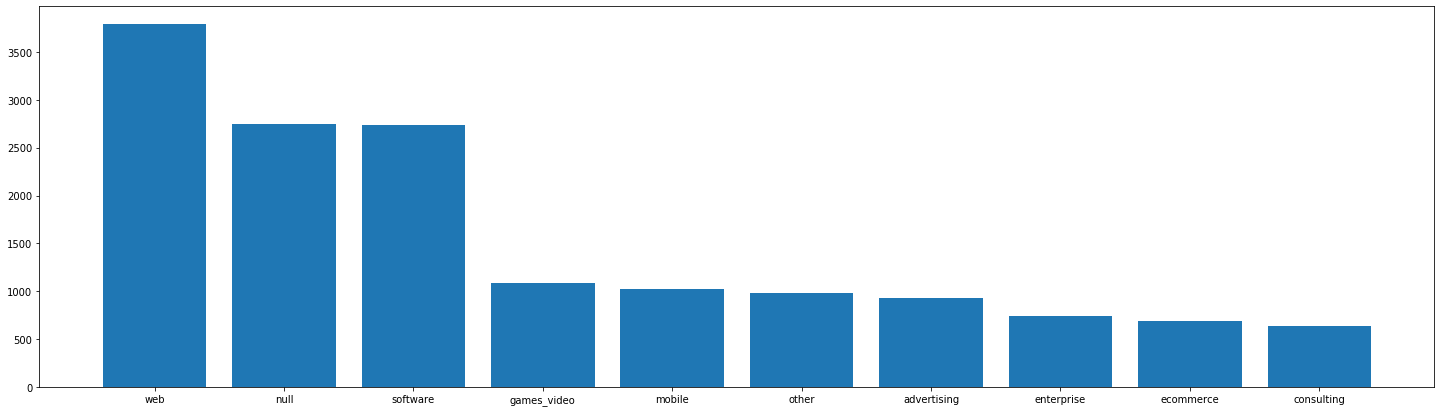

In [20]:
# Veremos las 10 categorías donde hay más empresas
plt.figure(figsize=(25,7))
plt.bar(cate.index.values[:10],cate.iloc(0)[:10])
plt.show();

In [21]:
category=df.copy()

In [22]:
# Creamos una nueva columna para saber qué empresas ya no existen
category['status']=category['deadpooled_year'].apply(lambda x:'Muerta' if x >= 0 else 'Activa')

In [23]:
# Hacemos un cruce para ver cuantas empresas activas y muertas hay para cada categoría
dead=pd.crosstab(category["category_code"],category["status"],margins=True)
dead.drop(['All','null'],axis=0,inplace=True)
dead

status,Activa,Muerta,All
category_code,,,
advertising,892,36,928
analytics,66,0,66
automotive,8,1,9
biotech,355,18,373
cleantech,281,24,305
consulting,630,7,637
design,4,0,4
ecommerce,646,42,688
education,36,0,36


In [24]:
dead['Pocertaje_muerte']=dead['Muerta']/dead['All']
dead.sort_values('Pocertaje_muerte',ascending=False,inplace=True)

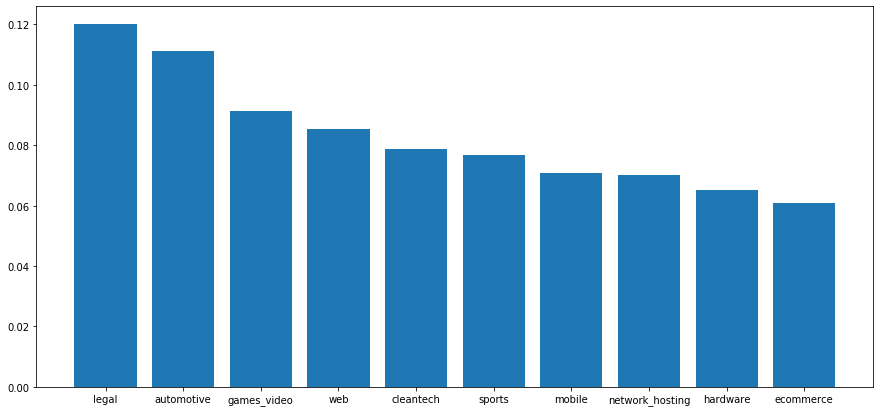

In [25]:
plt.figure(figsize=(15,7))
plt.bar(dead.index.values[:10],dead['Pocertaje_muerte'][:10])
plt.show();

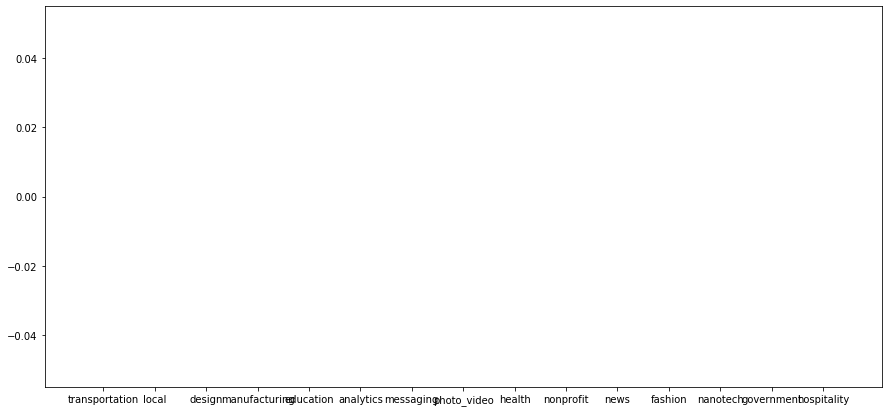

In [26]:
# Obtenemos las categorías con menor catnidad de muertes, vemos que hay muchas con muchas con 0 muertes
plt.figure(figsize=(15,7))
plt.bar(dead.index.values[len(dead)-15:],dead['Pocertaje_muerte'][len(dead)-15:])
plt.show();

In [27]:
dead

status,Activa,Muerta,All,Pocertaje_muerte
category_code,,,,
legal,22,3,25,0.120000
automotive,8,1,9,0.111111
games_video,984,99,1083,0.091413
web,3463,324,3787,0.085556
cleantech,281,24,305,0.078689
sports,12,1,13,0.076923
mobile,946,72,1018,0.070727
network_hosting,582,44,626,0.070288
hardware,344,24,368,0.065217


In [28]:
# Veremos si hay cierta correlación entre las muertes de las empresas y el porcentaje de muerte
deads=dead[['Muerta','Pocertaje_muerte']]
deads.corr()

status,Muerta,Pocertaje_muerte
status,,
Muerta,1.000000,0.416562
Pocertaje_muerte,0.416562,1.000000


In [29]:
# Concluimos que hay poca correlación, por lo tanto la cantidad de empresas en una categoría 
# no influye en las muertes de las empresas.

In [30]:
# Vamos a consultar las valuaciones para cada empresa
valuacion=list(ofi_colec.find({'ipo.valuation_amount':{'$exists':True}},
                              {'_id':0,'ipo.valuation_currency_code':1,'ipo.pub_year':1,'category_code':1,'name':1,'ipo.valuation_amount':1}))

In [31]:
valuacion[:5]

[{'name': 'Facebook',
  'category_code': 'social',
  'ipo': {'valuation_amount': 104000000000,
   'valuation_currency_code': 'USD',
   'pub_year': 2012}},
 {'name': 'Twitter',
  'category_code': 'social',
  'ipo': {'valuation_amount': 18100000000,
   'valuation_currency_code': 'USD',
   'pub_year': 2013}},
 {'name': 'eBay',
  'category_code': 'web',
  'ipo': {'valuation_amount': None,
   'valuation_currency_code': 'USD',
   'pub_year': 1998}},
 {'name': 'CBS',
  'category_code': 'news',
  'ipo': {'valuation_amount': None,
   'valuation_currency_code': 'USD',
   'pub_year': None}},
 {'name': 'Viacom',
  'category_code': 'web',
  'ipo': {'valuation_amount': None,
   'valuation_currency_code': 'USD',
   'pub_year': None}}]

In [32]:
valuaciones=[]
for val in valuacion:
    try:
        if val['ipo']['valuation_amount']>=0:
            valuaciones.append([val['name'],val['category_code'],val['ipo']['valuation_currency_code'],val['ipo']['valuation_amount'],val['ipo']['pub_year']])        
    except:
        pass

In [33]:
valuation=pd.DataFrame(valuaciones,columns=['name','category_code','valuation_currency_code','valuation_amount','pub_year'])

In [34]:
valuation.sort_values('valuation_amount',ascending=False)

,name,category_code,valuation_currency_code,valuation_amount,pub_year
46,GREE,games_video,JPY,108960000000,2008.0
0,Facebook,social,USD,104000000000,2012.0
4,Amazon,ecommerce,USD,100000000000,1997.0
1,Twitter,social,USD,18100000000,2013.0
43,Groupon,web,USD,12800000000,2011.0
...,...,...,...,...,...
59,Energy and Power Solutions,cleantech,USD,25000000,2010.0
14,Vringo,software,USD,11003200,2010.0
54,GT Solar,cleantech,USD,5000000,2008.0
36,DeNA,games_video,JPY,117900,2005.0


In [35]:
pd.pivot_table(valuation, index='category_code',aggfunc=np.mean)

,pub_year,valuation_amount
category_code,,
advertising,2010.400000,2.615000e+08
cleantech,2008.571429,2.186429e+08
ecommerce,2001.500000,3.380333e+10
education,2013.000000,1.100000e+09
enterprise,2008.428571,2.917643e+08
games_video,2006.000000,2.184685e+10
hardware,NaN,9.430000e+09
legal,2011.000000,1.096000e+09
mobile,2008.666667,4.578667e+08


In [36]:
valuation[valuation['category_code']=='games_video']

,name,category_code,valuation_currency_code,valuation_amount,pub_year
7,JumpTV,games_video,USD,100000000,2006.0
36,DeNA,games_video,JPY,117900,2005.0
40,DeNA,games_video,JPY,117900,2005.0
46,GREE,games_video,JPY,108960000000,2008.0
48,Tudou,games_video,USD,174000000,NaN


In [37]:
valuation['valuation_currency_code'].value_counts()

USD    56
JPY     3
EUR     2
Name: valuation_currency_code, dtype: int64

In [38]:
t_cambio=pd.read_excel('C:/Users/Lenovo/Documents/Ironhack/tipos de cambio.xlsx')

In [39]:
t_c=t_cambio.copy()

In [40]:
t_c.set_index(t_c.columns[0])

,EUR,JPY
Año,,
2019,1.119475,0.009178
2018,1.180955,0.009056
2017,1.129686,0.008915
2016,1.106903,0.009229
2015,1.109513,0.008261
2014,1.328501,0.009476
2013,1.328118,0.010260
2012,1.284789,0.012546
2011,1.391930,0.012559


In [41]:
# Traeremos a valor presente en dolares el valor de cada empresa para poder compararlas
val_usd=[]
for i in range(len(valuation)):
    if valuation['valuation_currency_code'][i]=='USD':
        year=valuation['pub_year'][i]
        val_usd.append(valuation['valuation_amount'][i]*((1+.036)**(2019-year)))
    else:
        year=valuation['pub_year'][i]
        moneda=valuation['valuation_currency_code'][i]
        cambio=t_c.loc[:,moneda][2019-year]
        val_usd.append((valuation['valuation_amount'][i]*cambio)*((1+.036)**(2019-year)))


In [42]:
valuation['Valor presente']=val_usd

In [43]:
valuation.sort_values('Valor presente',ascending=False,inplace=True)

In [44]:
valuation.reset_index(inplace=True)

In [45]:
valuation.drop('index',axis=1,inplace=True)

In [46]:
valuation

,name,category_code,valuation_currency_code,valuation_amount,pub_year,Valor presente
0,Amazon,ecommerce,USD,100000000000,1997.0,2.177282e+11
1,Facebook,social,USD,104000000000,2012.0,1.332145e+11
2,Twitter,social,USD,18100000000,2013.0,2.237882e+10
3,Tencent,web,USD,11000000000,2004.0,1.869774e+10
4,BMC Software,software,USD,6000000000,1988.0,1.795989e+10
...,...,...,...,...,...,...
56,DeNA,games_video,JPY,117900,2005.0,1.759160e+03
57,DeNA,games_video,JPY,117900,2005.0,1.759160e+03
58,Higher One,ecommerce,USD,1060000000,NaN,NaN
59,Tudou,games_video,USD,174000000,NaN,NaN


In [47]:
g_val=valuation.groupby('category_code').mean().sort_values('Valor presente',ascending=False)
g_val

,valuation_amount,pub_year,Valor presente
category_code,,,
ecommerce,3.380333e+10,2001.500000,1.091412e+11
social,4.380333e+10,2012.000000,5.598264e+10
web,5.078962e+09,2009.833333,7.429002e+09
travel,3.000000e+09,2011.000000,3.981065e+09
real_estate,2.550000e+09,2011.000000,3.383905e+09
search,1.862333e+09,2010.000000,2.860980e+09
software,1.342667e+09,2006.750000,2.625028e+09
legal,1.096000e+09,2011.000000,1.454416e+09
education,1.100000e+09,2013.000000,1.360039e+09


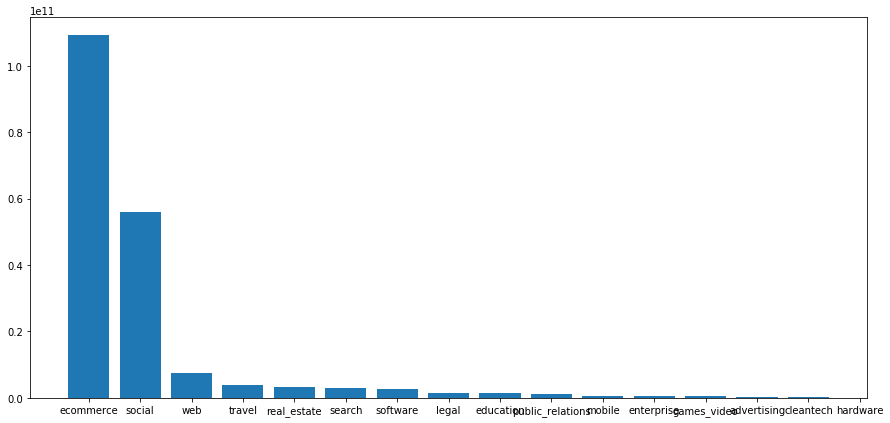

In [48]:
plt.figure(figsize=(15,7))
plt.bar(g_val.index.values,g_val['Valor presente'])
plt.show();

In [49]:
# Ya que a valor presente la categoría mejor valuada tenemos la categoría de ecommerce tomaremos esta categoría.

In [50]:
valuation[valuation['category_code']=='ecommerce']

,name,category_code,valuation_currency_code,valuation_amount,pub_year,Valor presente
0,Amazon,ecommerce,USD,100000000000,1997.0,2.177282e+11
30,Shutterfly,ecommerce,USD,350000000,2006.0,5.543000e+08
58,Higher One,ecommerce,USD,1060000000,NaN,NaN


In [51]:
categories=df[df['category_code']=='ecommerce']

In [52]:
categories.reset_index(inplace=True)

In [53]:
# Vamos a ver si hay relación entre la ubicación de la empresa y su rendimiento

In [54]:
# primero obtendremos las primeras 10 empresas más importantes en la categoría con los datos que tenemos

In [55]:
ofi=categories[['name','offices']]

In [56]:
# Generamos una lista con las oficinas de cada empresa
oficinas=[]
for of in range(len(ofi['offices'])):
    for i in ofi['offices'][of]:
        if i['latitude']!=None and i['longitude']!=None:
            oficinas.append([ofi['name'][of],i['latitude'],i['longitude']])

In [57]:
oficinas[:5]

[['Wize', 37.559287, -122.302262],
 ['Zlio', 48.862825, 2.381836],
 ['TheFind', 37.391502, -122.073463],
 ['Zazzle', 37.5108541, -122.2013557],
 ['Edgeio', 37.443058, -122.161674]]

In [58]:
ubicaciones=[]
for t in oficinas:
    ubicaciones.append(t[1:])

In [59]:
# Obtenemos las ubicaciones disponibles de todas nuestras oficinas n la categoría ecommerce
ubicaciones[:5]

[[37.559287, -122.302262],
 [48.862825, 2.381836],
 [37.391502, -122.073463],
 [37.5108541, -122.2013557],
 [37.443058, -122.161674]]

In [60]:
mapa=folium.Map([36.2422994, -113.7487596], zoom_start=3) 
#Ubicación de Estados Unidos según Google Maps, el zoom =3 es debido a que Alaska y HAwai son territorio de E.U

In [63]:
mapa.add_child(plugins.HeatMap(ubicaciones, radius=15))

In [62]:
# Vemos que la mayoria de las empresas están concentradas en EU, el oeste de Europa y el su de Asia

In [65]:
ecom = requests.get('https://www.linio.com.ar/sp/indice-ecommerce')

In [66]:
ecom

<Response [200]>

In [67]:
contenido = ecom.content

In [68]:
sopa = bs(contenido, 'html.parser')

In [69]:
tablas = sopa.find_all('table',{'class':'precios-tabla tablesorter tablesorter-default'})

In [111]:
paises = tablas[3].findAll('tbody')

In [106]:
ult = paises[0].findAll('td')

In [109]:
ult[15].text

'Sudáfrica'

In [87]:
titulos=['América','Asia','Europa','Medio Oriente y Otros']

In [118]:
data=[]
for i in range(len(titulos)):
    paises = tablas[i].findAll('tbody')
    ult = paises[0].findAll('td')
    for i in range(0,len(ult),3):
        pais = ult[i].text.strip()
        valor = ''.join(re.findall('\d',ult[i+1].text))
        por = re.findall('\d+',ult[i+2].text)[0]
        data.append([pais,int(valor),float(por)/100])

In [119]:
data

[['EUA', 504582000000, 0.88],
 ['México', 17629609834, 0.65],
 ['Canadá', 39966000000, 0.9],
 ['Brasil', 19722580000, 0.71],
 ['Chile', 5888000000, 0.78],
 ['Argentina', 4260738000, 0.93],
 ['Colombia', 4000000000, 0.63],
 ['Perú', 4000000000, 0.68],
 ['Ecuador', 800000000, 0.8],
 ['Venezuela', 449000000, 0.53],
 ['China*', 636087000000, 0.55],
 ['Japón', 81693000000, 0.93],
 ['Corea del Sur', 63720000000, 0.93],
 ['India', 22138000000, 0.34],
 ['Indonesia', 9536000000, 0.54],
 ['Singapur', 4110000000, 0.84],
 ['Tailanda', 3757000000, 0.82],
 ['Malasia', 3144000000, 0.78],
 ['Vietnam', 2269000000, 0.66],
 ['Filipinas', 840000000, 0.63],
 ['Reino Unido', 86450000000, 0.95],
 ['Alemania', 70345000000, 0.96],
 ['Francia', 49432000000, 0.93],
 ['España', 16686000000, 0.93],
 ['Italia', 15628000000, 0.92],
 ['Países Bajos', 14032000000, 0.96],
 ['Suecia', 10801000000, 0.97],
 ['Polonia', 8194000000, 0.78],
 ['Austria', 8144000000, 0.88],
 ['Noruega', 7254000000, 0.99],
 ['Suiza', 6912000000

In [122]:
ecom=pd.DataFrame(data, columns=['Pais','Ventas e-commerce','Porcentaje de penetracion de internet'])

In [132]:
ecom.sort_values('Ventas e-commerce',inplace=True,ascending=False) #.reset_index()#inplace=True)

In [135]:
ecom.reset_index(inplace=True)

In [140]:
ecom.drop('index',axis=1,inplace=True)

In [142]:
ecom.corr()

,Ventas e-commerce,Porcentaje de penetracion de internet
Ventas e-commerce,1.00000,-0.10613
Porcentaje de penetracion de internet,-0.10613,1.00000


In [145]:
# Vemos que hay muy poca correlacion entre el porcentaje de penetracion de internet y las ventas de e-commerce, 
# por lo tanto el pocentaje de penetración de internet no influye en las ventas de e-commerce

In [152]:
ecom[:15]

,Pais,Ventas e-commerce,Porcentaje de penetracion de internet
0,China*,636087000000,0.55
1,EUA,504582000000,0.88
2,Reino Unido,86450000000,0.95
3,Japón,81693000000,0.93
4,Alemania,70345000000,0.96
5,Corea del Sur,63720000000,0.93
6,Francia,49432000000,0.93
7,Canadá,39966000000,0.90
8,India,22138000000,0.34
9,Brasil,19722580000,0.71


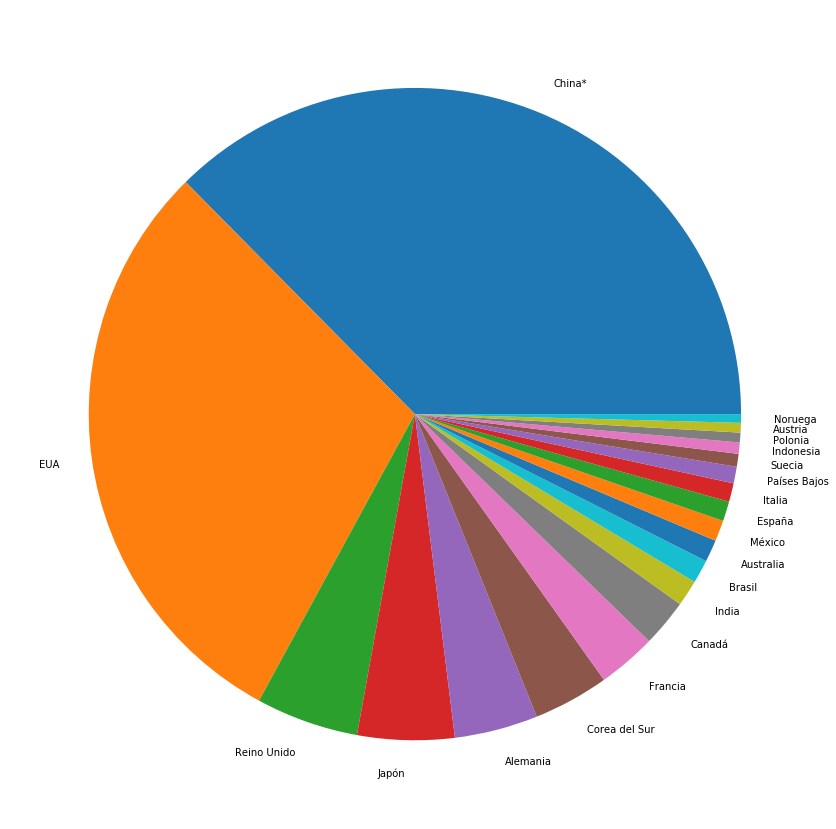

In [151]:
plt.figure(figsize=(15,15))
plt.pie(ecom['Ventas e-commerce'][:20], labels=ecom['Pais'][:20])
plt.show();

## Si queremos elegir el país tomando en cuenta la cantidad de ventas actuales, pondríamos nuestra empresa en EU o China. 

## Si queremos tomar como preferencia el porcentaje de penetracion de internet y suponiendo que conforme pasen los años el porcentaje irá aumentando serían muy buena opción escoger los países con bajos pocentajes, por ejemplo: China, India o México.